## Effectively Using Matplotlib

Full article on [pbpython.com](http://pbpython.com/effective-matplotlib.html)

### Résumé en image :

<img src="matplotlib-exemple.png" />

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Ensure plots are displayed inline
%matplotlib inline
#%matplotlib notebook

In [3]:
# Read in some data to show some real world exampled
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

In [4]:
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


Summarize the data by customer and get the top 10 customers.
Also, clean up the column names for consistency

In [5]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [6]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [7]:
type(top_10)

pandas.core.frame.DataFrame

Look at available styles

In [8]:
plt.style.available

['seaborn-notebook',
 'seaborn-pastel',
 'seaborn-talk',
 'seaborn-poster',
 'Solarize_Light2',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'ggplot',
 'seaborn',
 'classic',
 'seaborn-muted',
 '_classic_test',
 'seaborn-white',
 'tableau-colorblind10',
 'bmh',
 'fivethirtyeight',
 'fast',
 'seaborn-dark',
 'grayscale',
 'seaborn-deep',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-paper',
 'dark_background']

Use the ggplot style to improve the overall esthetics.

In [9]:
#plt.style.use('ggplot')

Get the figure and axes for future customization

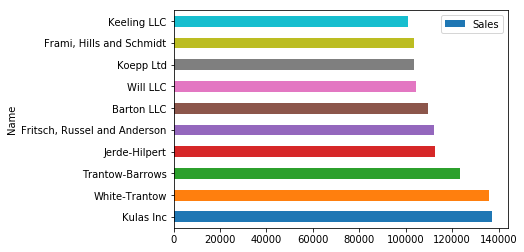

In [10]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax);

Set some limits and labels

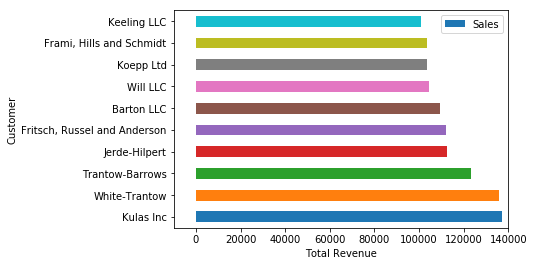

In [11]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

Alternative api using set

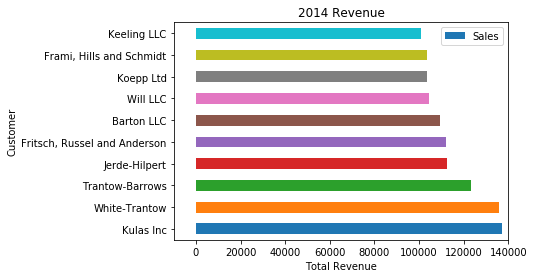

In [12]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer');

Hide the legend since it is not useful in this case. Also change the size of the image.

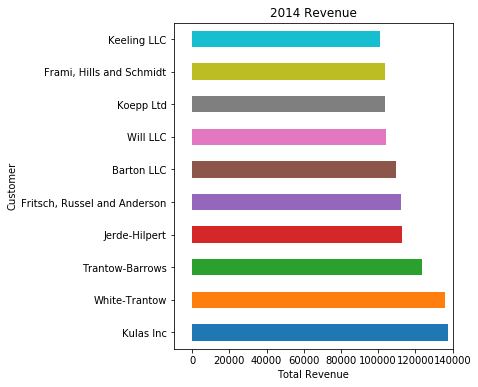

In [13]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
ax.legend().set_visible(False)

Add some annotations, and turn off the grid - just to show how it is done

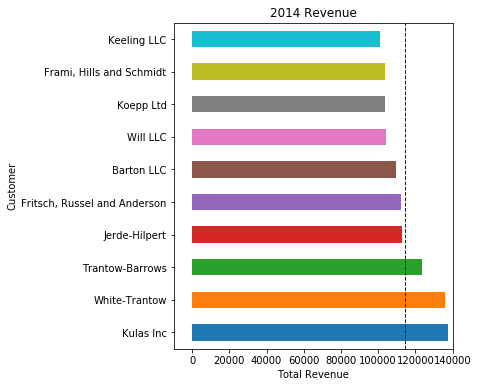

In [14]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)
ax.grid(False)
ax.legend().set_visible(False)

To clean up the currency in Total Revenue, we define a custom formatting function

In [15]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

Use the new formatter

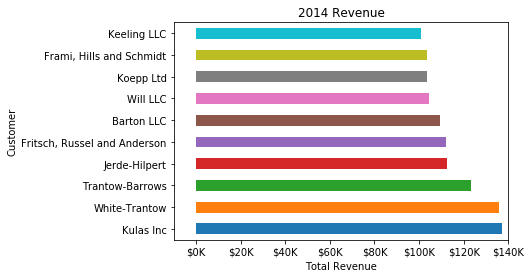

In [16]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

Fully commented example

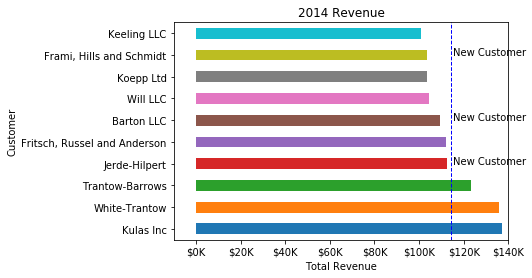

In [17]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")
    
# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False);

Add two plots to a figure

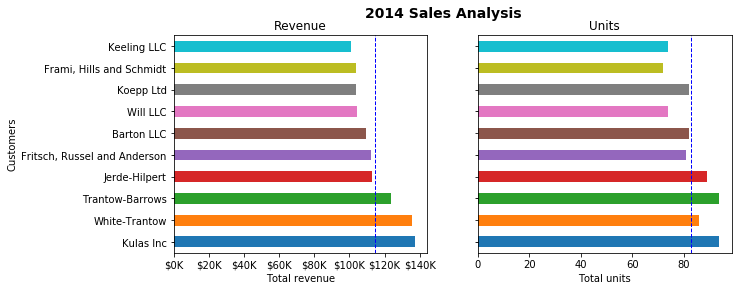

In [18]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))

# Build the first plot
top_10.plot(kind='barh', x='Name', y='Sales', ax=ax0)
ax0.set(title='Revenue', xlabel='Total revenue', ylabel='Customers')
formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)

# Add average line to the first plot
revenue_average = top_10['Sales'].mean()
ax0.axvline(x=revenue_average, color='b', label='Average', linestyle='--', linewidth=1)

# Build the second plot
top_10.plot(kind='barh', x='Name', y='Purchases', ax=ax1)
ax1.set(title='Units', xlabel='Total units', ylabel='')

# Add average line to the second plot
purchases_average = top_10['Purchases'].mean()
ax1.axvline(x=purchases_average, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

# Hide the plot legends
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

Save some files

In [19]:
# Let's look at how to save the files
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [20]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

Display the file to see what it looks like

In [21]:
from IPython.display import Image

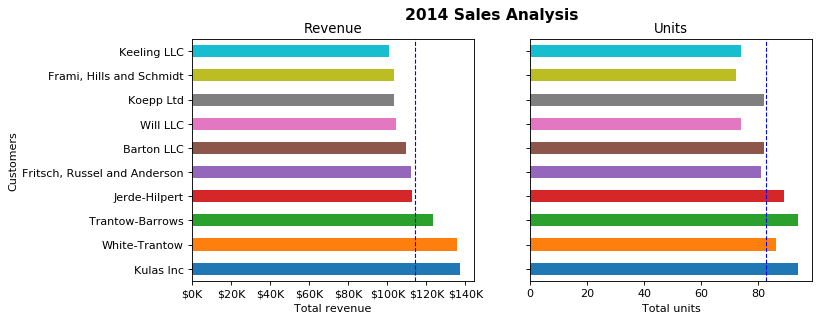

In [22]:
Image('sales.png')